<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9333
Precision (macro): 0.9333
Recall (macro): 0.9333
F1 (macro): 0.9333
Number of support vectors per class: [ 5 13 14]


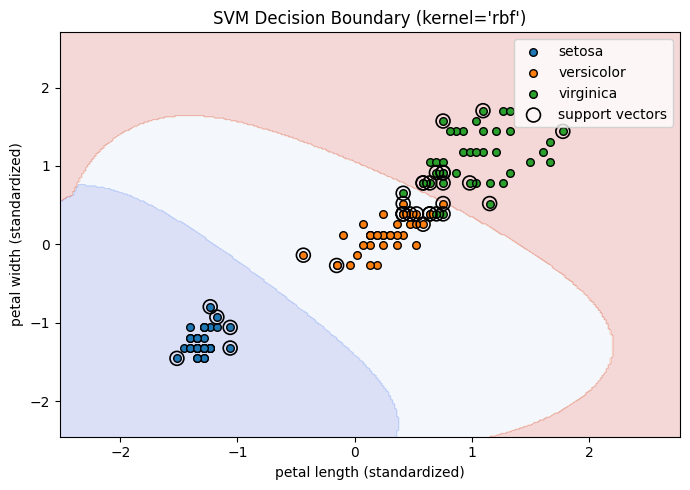

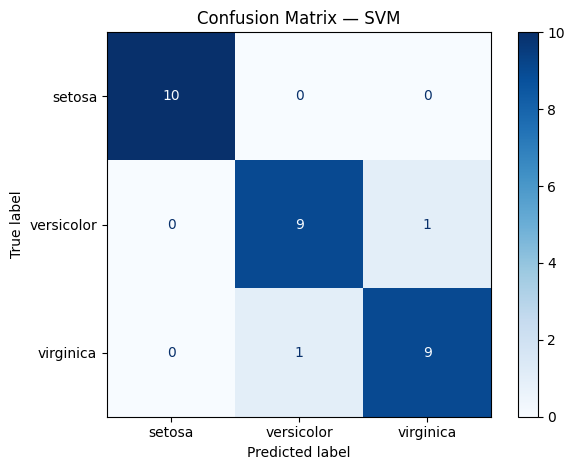

In [17]:
# exp_svm_iris.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# 1. Load dataset and select 2 features for plotting clarity
data = load_iris(as_frame=True)
# use petal length and petal width (good separability)
X = data.data[["petal length (cm)", "petal width (cm)"]].values
y = data.target

# (Optional) reduce to binary classification for simpler boundary (comment out to keep 3-class)
# keep only classes 0 and 1:
# mask = y != 2
# X = X[mask]; y = y[mask]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 4. Fit SVM
# change kernel to 'linear' or 'rbf' as needed. C controls margin vs slack, gamma for rbf.
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=False, random_state=42)
model.fit(X_train, y_train)

# 5. Predict & metrics
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision (macro):", round(precision_score(y_test, y_pred, average='macro'), 4))
print("Recall (macro):", round(recall_score(y_test, y_pred, average='macro'), 4))
print("F1 (macro):", round(f1_score(y_test, y_pred, average='macro'), 4))
print("Number of support vectors per class:", model.n_support_)

# 6. Essential plot: decision boundary (2D) + support vectors
# build grid
xx, yy = np.meshgrid(
    np.linspace(X_train[:,0].min()-1, X_train[:,0].max()+1, 300),
    np.linspace(X_train[:,1].min()-1, X_train[:,1].max()+1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
# plot training points
for class_idx, label in enumerate(data.target_names):
    pts = X_train[y_train==class_idx]
    plt.scatter(pts[:,0], pts[:,1], s=30, label=label, edgecolor='k')
# support vectors (in scaled space)
sv = model.support_vectors_
plt.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors='k', linewidths=1.2, label='support vectors')
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.title("SVM Decision Boundary (kernel='{}')".format(model.kernel))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 7. Confusion matrix (optional necessary metric plot)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=data.target_names, cmap='Blues')
plt.title("Confusion Matrix — SVM")
plt.tight_layout()
plt.show()
